###Business understanding
In this section we will be getting to know our main problem and goal.

Data contains:

TV promotion budget (in million)

Social Media promotion budget (in million)

Radio promotion budget (in million)

Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer

Sales (in million)

Our main purpose is to determine wether and how variables TV promotion budget, Social Media promotion budget, Radio promotion budget and Influencer affect Sales. 

###Data understanding
In this section we will be downloading our dataset and getting to know with whitch variables and data we dispose of.

In [2]:
#Firstly, we are going to load some libraries that are going to help us in modeling our problem
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import chisquare, anderson

In [3]:
#First step is to load our data set
df = pd.read_csv('Dummy Data HSS-1.csv')

In [4]:
#Second step is to print head of our dataset to get to know how our data looks like
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [5]:
#So is to be done with the last few of our lines
df.tail()

,TV,Radio,Social Media,Influencer,Sales
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411
4571,42.0,15.966688,5.046548,Micro,148.202414


In [6]:
#Third step is to print general information about our dataset, for example what are our columns, how many nonull values we have,
#what is the type of our data etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [7]:
#We have to check the size of our dataset, that is, how many columns and rows do we have.
df.shape

(4572, 5)

In [62]:
#We use describe function to see basic statistics of our variables.
df.describe()

,TV,Radio,Social Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


###Data preparation
In this section we will be preparing our data for modeling that is, we will be cleaning our data from null values, checking for outliers, visualizing our data, transforming our cathegorical data to numerical ones and see how are our data correlated.

In [8]:
#Now we are checking the egzistence of null values
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

We can see that in our dataset egzist null values for variables TV, Radio, Social Media and Sales. Initially we have two options: first one is to drop (delete) all null values and that is considered right when we have a huge dataset and a little null values; but second opitons is more appiable if we have little dataset and present null values - we can imput that is replace null values eather with mean of each variable that has null values (if its distribution is normal) or we can replace our null values with median of each variable that has null values (if its distribution is not normal). 
In this case we have a huge dataset with little null values so we are going to choose the first option - to delet null values.

In [11]:
df2 = df.dropna(axis = 0)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 213.1+ KB


In [13]:
df2.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

We can see that we now do not have null values so we are going to check for normality of our numeric variables.

H0: Distribution of each variable is normal.

H1: There is statistically significant differece between distribution of each variable and normal distribution, that is each variable has abnormal distribution.

In [15]:
def normality_check(column):
  data = df2[column]
  result = anderson(data)
  print("Normality check for feature: " + column)
  print('Statistic:%5f'% result.statistic)
  p=0
  for i in range(len(result.critical_values)):
      sl,cv = result.significance_level[i], result.critical_values[i]
      if result.statistic < result.critical_values[i]:
          print('%5f: %5f, Distribution is normal (we cannot reject H0)' %(sl, cv))
      else:
          print('%5f: %5f, Distribution is not normal ( we reject H0, and we accept H1)' %(sl, cv))
  print("")

columns = ['TV', 'Radio', 'Social Media', 'Sales']
for column in columns:
  normality_check(column)

Normality check for feature: TV
Statistic:50.015354
15.000000: 0.575000, Distribution is not normal ( we reject H0, and we accept H1)
10.000000: 0.655000, Distribution is not normal ( we reject H0, and we accept H1)
5.000000: 0.786000, Distribution is not normal ( we reject H0, and we accept H1)
2.500000: 0.917000, Distribution is not normal ( we reject H0, and we accept H1)
1.000000: 1.091000, Distribution is not normal ( we reject H0, and we accept H1)

Normality check for feature: Radio
Statistic:18.726727
15.000000: 0.575000, Distribution is not normal ( we reject H0, and we accept H1)
10.000000: 0.655000, Distribution is not normal ( we reject H0, and we accept H1)
5.000000: 0.786000, Distribution is not normal ( we reject H0, and we accept H1)
2.500000: 0.917000, Distribution is not normal ( we reject H0, and we accept H1)
1.000000: 1.091000, Distribution is not normal ( we reject H0, and we accept H1)

Normality check for feature: Social Media
Statistic:39.568980
15.000000: 0.57

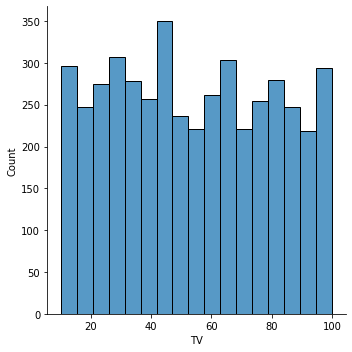

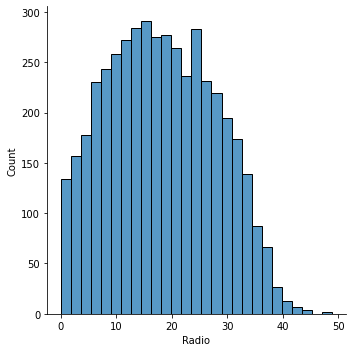

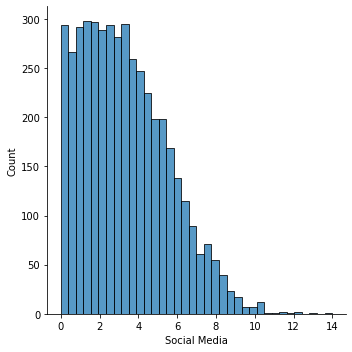

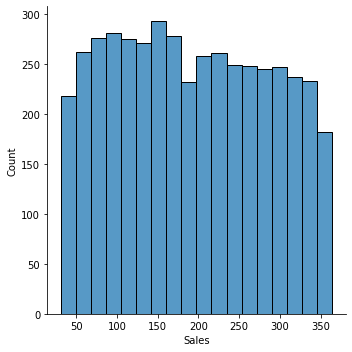

In [22]:
num_varijable = ['TV', 'Radio', 'Social Media', 'Sales']
for column in num_varijable:
  #Create the distplot
  ax=sns.displot(x = df2[column], kind = 'hist')
  plt.show()

From both, the normality check with Anderson-Darling's test and histogram of frequencies we can see that neither of these variables has the normal distribution. This is important for us because some algorithms only work if distribution is normal. Also we need normality check for correlation beacuse we will be usig Spearman's coefficient of correlation instead of Pearson's.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


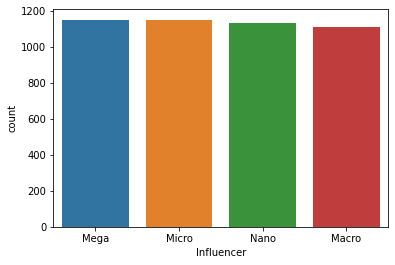

In [35]:
sns.countplot(df2['Influencer'])

From this countplot we can see that we have balanced data. Since variable Influencer is cathegorical we have to change cathegorical values to numerical ones. We will do that with LabelEncoder.

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
InfluencerLE = le.fit_transform(df2['Influencer'])

df2.drop(columns='Influencer', axis = 1)
df2['Influencer'] = InfluencerLE

In [44]:
df2

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,1,54.732757
1,13.0,9.237765,2.409567,1,46.677897
2,41.0,15.886446,2.913410,1,150.177829
3,83.0,30.020028,6.922304,1,298.246340
4,15.0,8.437408,1.405998,2,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,2,94.685866
4568,71.0,20.610685,6.545573,3,249.101915
4569,44.0,19.800072,5.096192,2,163.631457
4570,71.0,17.534640,1.940873,0,253.610411


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   int64  
 4   Sales         4546 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 342.1 KB


Now all our variables are clean and numerical so we can go to the next step that is choosing the best variables for our linear regression model. With scatter plot we will see how our independent varibales look compared to dependent variable Sales.

<function matplotlib.pyplot.show>

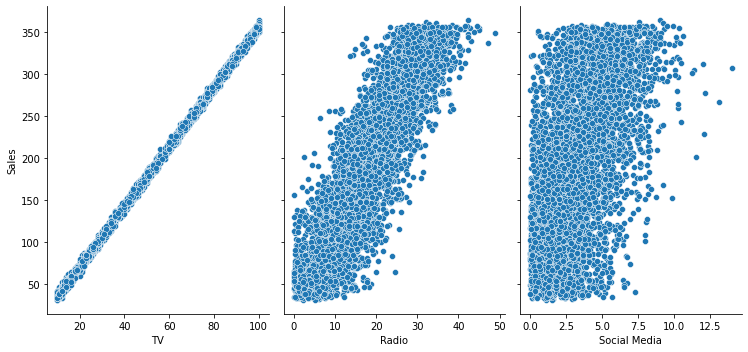

In [40]:
sns.pairplot(df2.head(4546), x_vars=['TV', 'Radio', 'Social Media'],
                          y_vars='Sales',height=5, aspect=0.7, kind='scatter')
plt.tight_layout()
plt.show

We can see that our variable TV is strongly correlated with variable Sales and that variable Radio has also a pretty much strong correlation with Sales but that is not really case with variable Social Media.

Our next step is to check for outliers in our data set. Outliers can be very troubling so we need to check if they are present and if they are we have to determine whether they are potential or true outliers.

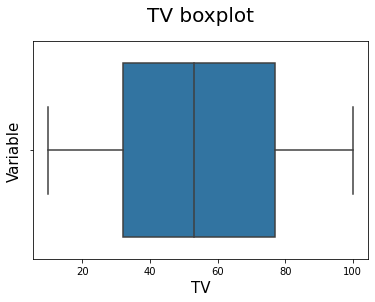

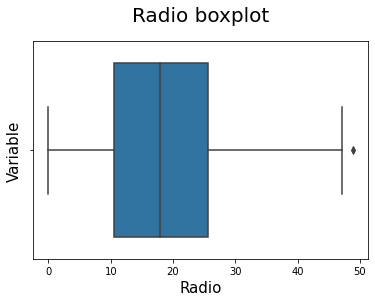

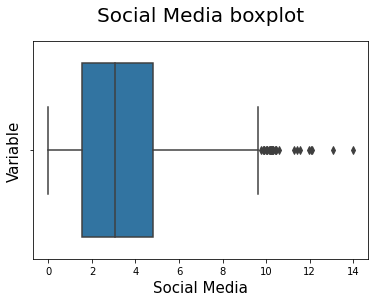

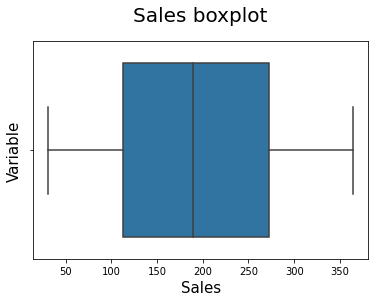

In [47]:
num_varijable = ['TV', 'Radio', 'Social Media', 'Sales']
for column in num_varijable:
  #Create the boxplot
  ax=sns.boxplot(x = df2[column])

  #Add labels to the plot
  ax.set_xlabel(column, fontsize=15)
  ax.set_ylabel('Variable', fontsize=15)
  ax.set_title(column + ' boxplot', fontsize=20, pad=20)

  plt.show()

From our boxplot we can see that there are some outliers within variables Radio and Social Media so we will check whether they are potential or true.

In [48]:
#Function for outliers detection
#Function for outliers detection
def outliers_detection(df2_input, column):
    
    df2_lower_quartile= df2_input[column].quantile(0.25)
    df2_uper_quartile= df2_input[column].quantile(0.75)


    #Extract the inter quantile range
    df2_iqr= df2_uper_quartile - df2_lower_quartile

    #Get the upper and lower bounds
    lower_bound_up= df2_uper_quartile + 1.5*df2_iqr
    upper_bound_up= df2_uper_quartile + 3*df2_iqr

    #Get the upper and lower bounds
    upper_bound_down= df2_lower_quartile - 1.5*df2_iqr
    lower_bound_down= df2_lower_quartile - 3*df2_iqr

    #Extract values outside the upper bound
    df2_outliers_current= df2_input[(df2_input[column] > upper_bound_up) | (df2_input[column] < lower_bound_down)]
    df2_input = df2_input[(df2_input[column] <= upper_bound_up) & (df2_input[column] >= lower_bound_down)]

    df2_outliers_current['variable']=column
    return df2_input, df2_outliers_current

df2_cleaned=df2
df2_outliers = pd.DataFrame()
num_varijable = ['TV', 'Radio', 'Social Media', 'Sales']
for column in num_varijable:
    df2_cleaned, df2_outliers_temp = outliers_detection(df2_cleaned, column)
    df2_outliers = df2_outliers.append(df2_outliers_temp)
#%%
df2_outliers


,TV,Radio,Social Media,Influencer,Sales,variable


We can see that we do not have true outliers only potential so we will leave them be since they do not represent problem in data.

In [49]:
df2.shape

(4546, 5)

Last step before modeling is to see how our variables are correlated between themselves. We will be doing that by showing triangular correlation matrix, precisely using Spearman's correlation matrix of rank.

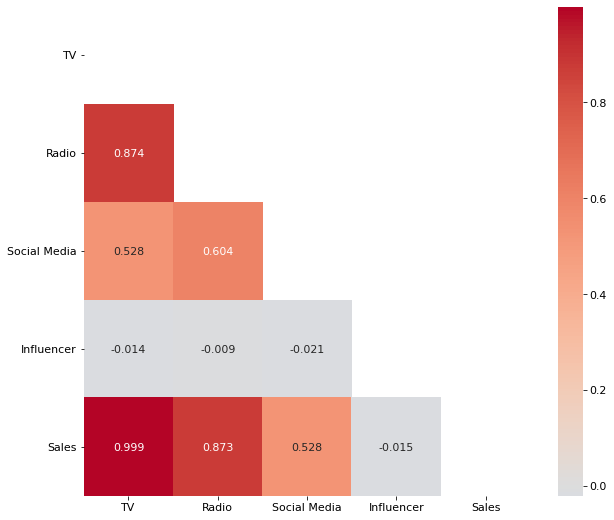

In [50]:
# Correlation matrix
import matplotlib
correlations = df2.corr(method="spearman")
params = {'axes.titlesize':'9',
          'xtick.labelsize':'11',
          'ytick.labelsize':'11'}
matplotlib.rcParams.update(params)
fig, ax = plt.subplots(figsize=(10,9))
mask = np.zeros(correlations.shape)
upper_triangle_indices = np.triu_indices_from(mask)
mask[upper_triangle_indices] = True
sns.heatmap(correlations, fmt= ".3f", annot=True, annot_kws={"size":11}, cmap= 'coolwarm', center=0, mask = mask)
plt.yticks(rotation=0)
plt.show()

Based on the triangular correlation matrix, we see that there is an almost perfect correlation between the variable Sales and TV, which means that the movement of the variable Sales is completely defined by the movement of the variable TV. As for the other variables, there is a strong direct correlation between the Sales and Radio variables, and there is a moderate direct correlation between the Sales and Social Media variables. As for the variable Influencer, although its direction of movement is inverse to the movement of other variables and especially the dependent variable Sales, the value of the coefficient is too small to be taken into account when building the model.

###Modeling
In this section we will be choosing whitch variables will be X and whitch one y, dividing our data set on test and train data and build our regression model.

In [51]:
#Defining whitch variables will be X (independent) and whitch one will be y (dependent)

X = df2.drop(columns = ['Influencer', 'Sales'], axis = 1)
y = df2[['Sales']]

In [52]:
#Dividing our dataset on train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [53]:
#Building our linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
#We use our trained model on test data
y_pred_lr = lr.predict(X_test)

###Evaluation

After training and using our model for prediction we will evaluate our model to see whether our predictions are close to real data. Since this is linear regression model we are going to use the following metrics: Mean Absolute Error, Rooth Mean Squared Error as absolute metrics and R2 as relative metric.

In [55]:
from sklearn.metrics import r2_score, mean_absolute_error
import math
from sklearn import metrics

print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_lr))
print("R2_sccore =",r2_score(y_test, y_pred_lr))

Root Mean Squared Error:  3.0017772974321093
Mean Absolute Error:  2.41736159457942
R2_sccore = 0.9989658408469502


In [56]:
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

intercept: [-0.14496668]
slope: [[ 3.56638938 -0.0157049   0.01046961]]


Our metrics have shown us that our model is excellent since 99.897% of variations of variable Sales can be explained with joint variations of variables TV, Radio and Social Media.

###Modeling 2

But something is not to be excluded, and that is fact that since correlation between TV and Sales is almost 1 (0.999) we can use only that one variable for building our model so our multiple linear regression model becomes simple linear regression model.

In [57]:
X2 = df2[['TV']]
y2 = df2[['Sales']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 1)


In [58]:
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

LinearRegression()

In [59]:
y2_pred_lr = lr2.predict(X2_test)

###Evaluation 2

In [60]:
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y2_test, y2_pred_lr)))
print('Mean Absolute Error: ', mean_absolute_error(y2_test, y2_pred_lr))
print("R2_sccore =",r2_score(y2_test, y2_pred_lr))

Root Mean Squared Error:  2.998430435508499
Mean Absolute Error:  2.4149237582372844
R2_sccore = 0.9989681456537405


In [61]:
print('intercept:', lr2.intercept_)
print('slope:', lr2.coef_)

intercept: [-0.1470831]
slope: [[3.56178889]]


We can see that results do not differ from the previous ones so we can freely use only variable TV to predict the variable Sales.